## Healthy Habits: Exploring Organic Food Purchases on Instacart

As health-conscious consumers increasingly gravitate toward organic food, Instacart’s data provides a unique window into their shopping behaviors. This analysis explores how customers prioritize organic products, examining purchase frequency and the types of items most commonly added to carts. By identifying these patterns, we can reveal key trends and preferences that influence the organic food market on Instacart.

Citation: Jeremy Stanley, Meg Risdal, Sharathrao, Will Cukierski. (2017). Instacart Market Basket Analysis. Kaggle. https://kaggle.com/competitions/instacart-market-basket-analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from textwrap import wrap

In [3]:
#Importing the dataset
df_products = pd.read_csv('instacart_markey_basket_analysis/products.csv')
df_aisles = pd.read_csv('instacart_markey_basket_analysis/aisles.csv')
df_departments = pd.read_csv('instacart_markey_basket_analysis/departments.csv')
df_orders = pd.read_csv('instacart_markey_basket_analysis/orders.csv') 
df_ordprior = pd.read_csv('instacart_markey_basket_analysis/order_products__prior.csv') 

In [4]:
#Merging the product, aisle, and department data into a single DataFrame
df_pa = pd.merge(df_products, df_aisles, how='inner', on='aisle_id')
df_prod_ais_dep = pd.merge(df_pa, df_departments, how='inner', on='department_id')
df_prod_ais_dep = df_prod_ais_dep.drop(['aisle_id', 'department_id'], axis = 1)
df_orders = pd.merge(df_orders, df_ordprior, how='inner', on='order_id')
df_orders_product = pd.merge(df_orders, df_prod_ais_dep, how='inner', on='product_id' )
df_orders_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


### Exploratory Data Analysis on **Orders Including Organic Products**

To filter orders containing at least one organic product, I will first identify all organic products and then group by order_ID to determine which orders include these products. This will help reveal patterns in purchasing behavior among health-focused consumers.

In [16]:
# Filter products that are organic
df_organic_product = df_orders_product[df_orders_product['product_name'].str.contains('Organic')]
# Identify unique order_ids for orders containing organic product
organic_order_ids = df_organic_product['order_id'].unique()
# Filter the df_orders_product dataframe to include only orders with at least one organic product
df_organic_orders_product = df_orders_product[df_orders_product['order_id'].isin(organic_order_ids)]
df_organic_orders_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


In [25]:
df_organic_orders_product.order_id.nunique()
#Finding the number of total orders that include at least one organic products

2367444

In [27]:
df_orders.order_id.nunique()
#Finding the number of total orders

3214874

In [35]:
2367444/3214874 * 100
#Calculating the percentage of orders that include organic products

73.6403355154821

The data shows that 2,367,444 out of 3,214,874 total orders include at least one organic product, representing approximately 73.64% of all orders. This indicates a significant preference for organic products among Instacart shoppers. Such a high proportion suggests that a large segment of customers value the perceived health benefits and quality of organic options.

This insight underscores the importance of organic products in the marketplace, highlighting a strong consumer demand for healthier, natural food choices that could influence inventory strategies and marketing efforts.

### Shopping Habits: Hourly, Weekly, and Reorder Trends

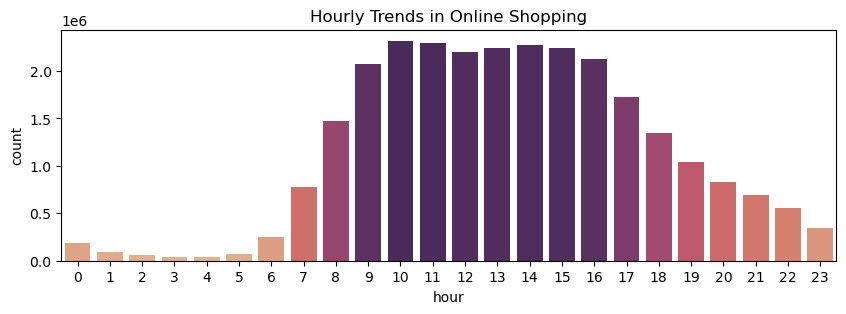

In [70]:
# Frequency Bar Chart: Hourly Trends in Online Shopping
df_organic_orders_hour_freq = df_organic_orders_product['order_hour_of_day'].value_counts().reset_index().sort_values('order_hour_of_day', ascending = True).reset_index(drop = True)
df_organic_orders_hour_freq.columns = ['hour', 'count']

plt.figure(figsize=(10, 3))
sns.barplot(x='hour', y='count', hue='count', data=df_organic_orders_hour_freq, palette='flare', legend=False)
plt.title('Hourly Trends in Online Shopping')
plt.show()

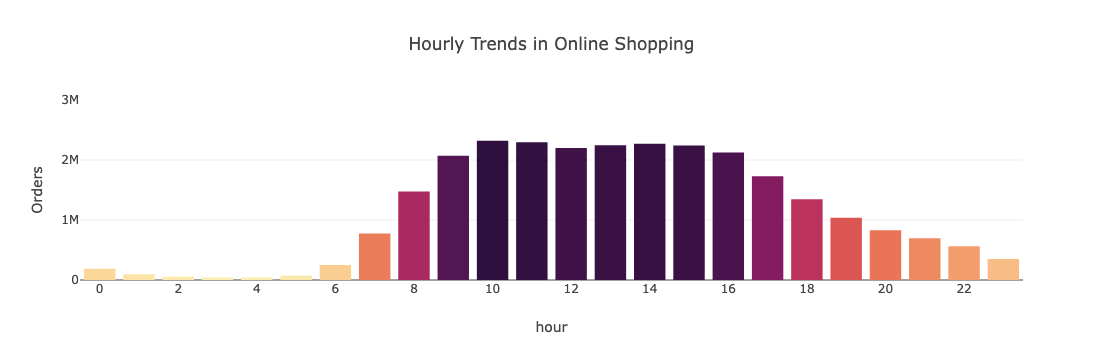

In [52]:
# To prepare for the interactive dashboard, I used the plotly function to create interactive bar graphs. 
# I also specified and adjusted the hover template
fig = px.bar(df_organic_orders_hour_freq, x='hour', y='count',
                color='count',  # Equivalent to the hue parameter in Seaborn
                color_continuous_scale= 'Matter',
                title='Hourly Trends in Online Shopping')
            
fig.update_traces(
        hovertemplate='<b>Hour:</b> %{x}<br><b>Orders:</b> %{y:,}<extra></extra>'
        )
        
fig.update_yaxes(range=[0, 3_000_000], title='Orders')
fig.update_coloraxes(showscale=False)
fig.update_xaxes(tickmode='linear', dtick=2)
fig.update_layout(height=400)
fig.show()

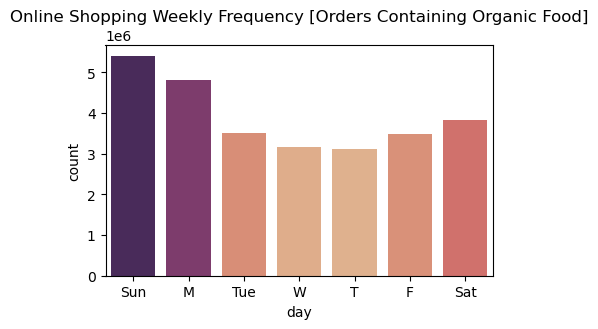

In [72]:
# Frequency Bar Chart: Weekly Trends in Online Shopping

df_organic_orders_day_freq = df_organic_orders_product['order_dow'].value_counts().reset_index().sort_values('order_dow', ascending = True).reset_index(drop = True)
df_organic_orders_day_freq.columns = ['day', 'count']

# Map the days to abbreviations
day_mapping = {
    0: 'Sun',
    1: 'M',
    2: 'Tue',
    3: 'W',
    4: 'T',
    5: 'F',
    6: 'Sat'
}

# Apply the mapping to the DataFrame
df_organic_orders_day_freq['day'] = df_organic_orders_day_freq['day'].map(day_mapping)

plt.figure(figsize=(5, 3))
sns.barplot(x='day', y='count', hue='count', data=df_organic_orders_day_freq, palette='flare', legend=False)
plt.title('Online Shopping Weekly Frequency [Orders Containing Organic Food]')
plt.show()

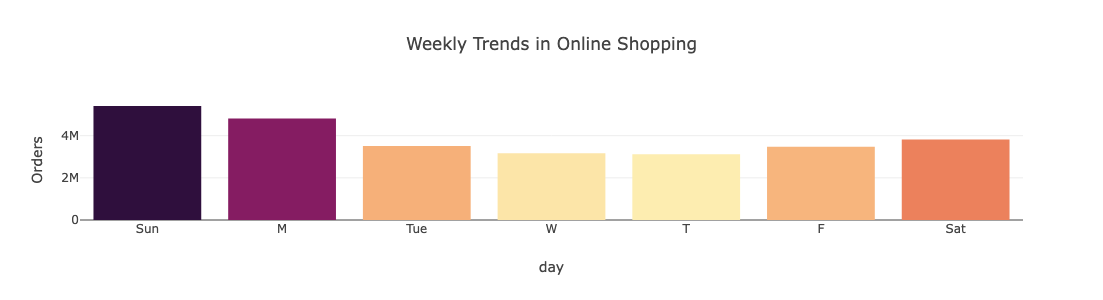

In [89]:
#Similarly, added interactive chart using Plotly
fig1 = px.bar(df_organic_orders_day_freq, x='day', y='count', color='count', 
                 color_continuous_scale= 'Matter', 
                 title ='Weekly Trends in Online Shopping')
fig1.update_traces(
            hovertemplate='<b>Hour:</b> %{x}<br><b>Orders:</b> %{y:,}<extra></extra>'
        )
        
fig1.update_coloraxes(showscale=False)
fig1.update_xaxes(tickmode='linear')
fig1.update_yaxes(title='Orders')
fig1.update_layout(height=300, width = 600)
fig1.show()

Online shopping activity peaks during late morning to early afternoon hours (9 AM - 5 PM) and is most frequent on weekends (Saturday and Sunday).

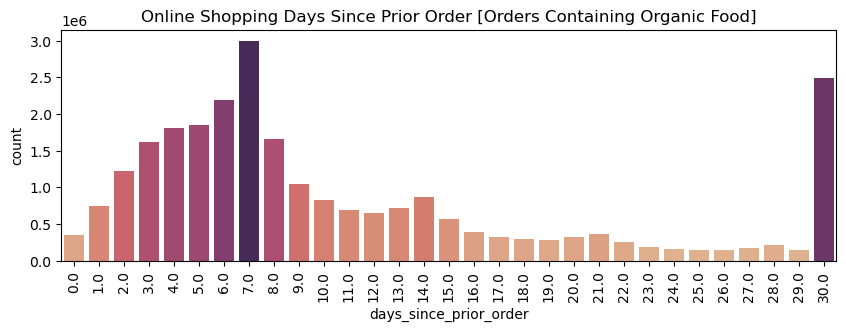

In [109]:
#Graph on Repurchase Trends
df_organic_orders_day_since_order = df_organic_orders_product['days_since_prior_order'].value_counts().reset_index().sort_values('days_since_prior_order', ascending = True).reset_index(drop = True)
df_organic_orders_day_since_order.columns = ['days_since_prior_order', 'count']

plt.figure(figsize=(10, 3))
sns.barplot(x='days_since_prior_order', y='count', hue='count', data=df_organic_orders_day_since_order, palette='flare', legend=False)
plt.title('Online Shopping Days Since Prior Order [Orders Containing Organic Food]')
plt.xticks(rotation=90)
plt.show()

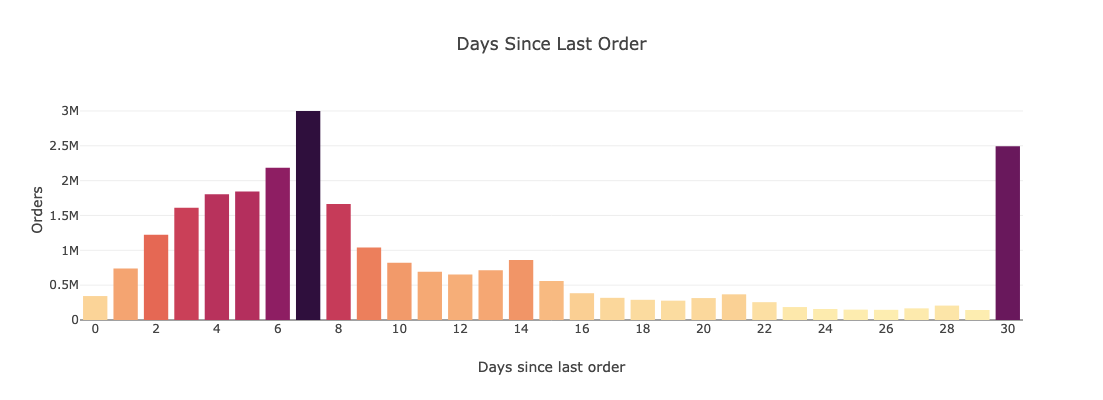

In [99]:
#Plotly chart on repurchasing behavior
fig2 = px.bar(df_organic_orders_day_since_order, x='days_since_prior_order', y='count', color='count', 
                     color_continuous_scale= 'Matter', 
                     title ='Days Since Last Order')
fig2.update_traces(
            hovertemplate='<b>Day:</b> %{x}<br><b>Orders:</b> %{y:,}<extra></extra>'
         )
            
fig2.update_coloraxes(showscale=False)
fig2.update_xaxes(tickmode='linear', dtick=2)
fig2.update_layout(height=400, width=900)
fig2.update_xaxes(title='Days since last order')
fig2.update_yaxes(title='Orders')
fig2.show()

Reorder activity peaks one week after purchase, with higher weekly order frequency. Setting reminders at the 1-week mark could encourage consistent reordering, especially for wellness and nutrient products. *Note: Orders with gaps over 30 days are capped at 30 in the dataset.

## Exploring Customer Preferences in Organic Product Purchases

In [101]:
# Filtering Organic Product information 
df_organic_prod_ais_dep = df_prod_ais_dep[df_prod_ais_dep['product_name'].str.contains('Organic')]
organic_product_ids = df_organic_product['product_id'].unique()
df_organic_prod_ais_dep = df_organic_prod_ais_dep[df_organic_prod_ais_dep['product_id'].isin(organic_product_ids)]
df_organic_prod_ais_dep.head()

,product_id,product_name,aisle,department
22,23,Organic Turkey Burgers,packaged poultry,meat seafood
32,33,Organic Spaghetti Style Pasta,dry pasta,dry goods pasta
40,41,Organic Sourdough Einkorn Crackers Rosemary,crackers,snacks
42,43,Organic Clementines,packaged vegetables fruits,produce
46,47,Onion Flavor Organic Roasted Seaweed Snack,asian foods,international


In [111]:
df_organic_product['product_id'].nunique()
#Finding the number of organic products offered on Instacart

5035

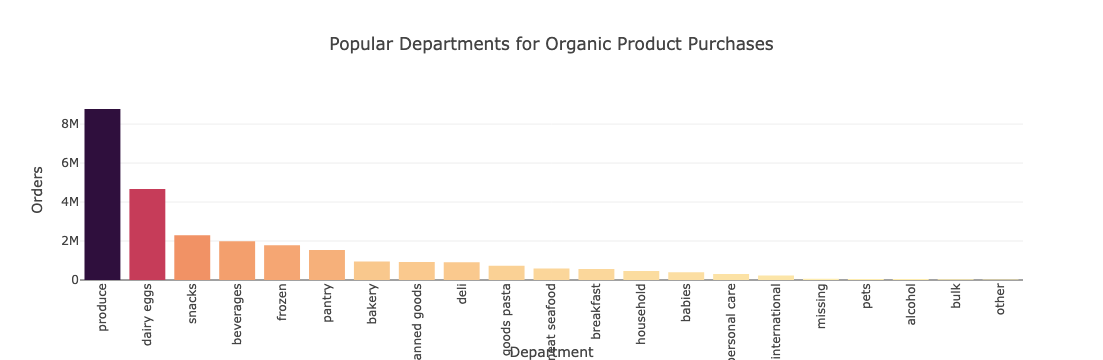

In [125]:
#Interactive Graph on Popular Departments 
data = df_organic_orders_product.groupby("department")["product_id"].count().sort_values(ascending=False).reset_index()
data.columns = ['department', 'total_purchases']

fig3 = px.bar(data, 
                 x='department', 
                 y='total_purchases', 
                 color='total_purchases', 
                 color_continuous_scale='Matter',
                 title='Popular Departments for Organic Product Purchases')
fig3.update_traces(
            hovertemplate='<b>Aisle:</b> %{x}<br><b>Orders:</b> %{y:,}<extra></extra>'
         )
            
fig3.update_layout(
        xaxis_title="Department",
        yaxis_title="Orders",
        xaxis=dict(tickangle=270),
    )
fig3.update_layout(height=350)
fig3.update_coloraxes(showscale=False)
fig3.show()

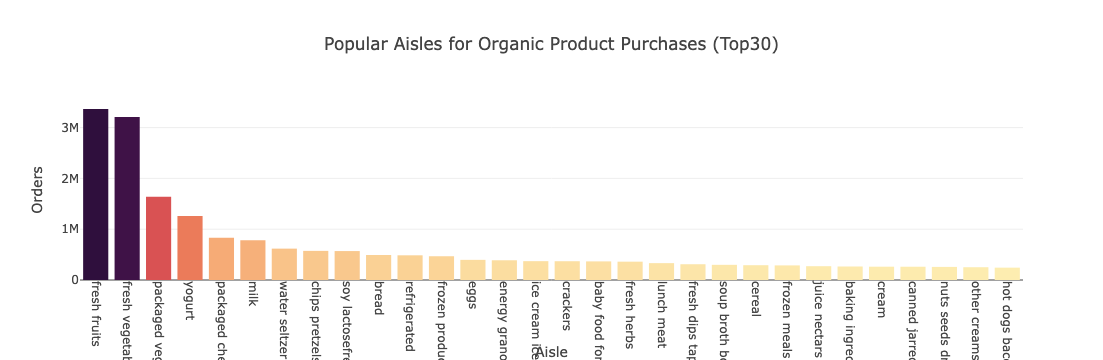

In [149]:
#Digging one level deeper, plotting Interactive graph on Popular Aisles (Top30)
data = df_organic_orders_product.groupby("aisle")["product_id"].count().sort_values(ascending=False).reset_index().head(30)
data.columns = ['aisle', 'total_purchases']

fig4 = px.bar(data, 
                 x='aisle', 
                 y='total_purchases', 
                 color='total_purchases', 
                 color_continuous_scale='Matter',
                 title='Popular Aisles for Organic Product Purchases (Top30)')
fig4.update_traces(
            hovertemplate='<b>Aisle:</b> %{x}<br><b>Orders:</b> %{y:,}<extra></extra>'
         )
            
fig4.update_layout(
        xaxis_title="Aisle",
        yaxis_title="Orders",
        xaxis=dict(tickangle=90),
    )
fig4.update_layout(height=400)
fig4.update_coloraxes(showscale=False)
fig4.show()

## Not sure how to make sure the x labels can all appear (It works in the dashboard but not in the notebook).

Fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt, cheese, milk aisles highly dominates in terms of number of product purchases

## Table on Reorder Organic Products

In [154]:
#Reordered Organic Products, Ranked highest to lowest by total purchase orders
df_organic_reorder = df_organic_product.groupby('product_name')['reordered'].agg(['count', 'sum']).reset_index()
df_organic_reorder.columns = ['product_name', 'total_purchase', 'reorders']
df_organic_reorder['% of reorder'] = df_organic_reorder['reorders']/df_organic_reorder['total_purchase'] * 100
df_organic_reorder.sort_values('total_purchase', ascending = False).reset_index(drop = True).head(10)

,product_name,total_purchase,reorders,% of reorder
0,Bag of Organic Bananas,379450,315913,83.255501
1,Organic Strawberries,264683,205845,77.770389
2,Organic Baby Spinach,241921,186884,77.250011
3,Organic Hass Avocado,213584,170131,79.655311
4,Organic Avocado,176815,134044,75.810310
5,Organic Whole Milk,137905,114510,83.035423
6,Organic Raspberries,137057,105409,76.908877
7,Organic Yellow Onion,113426,79072,69.712412
8,Organic Garlic,109778,74663,68.012717
9,Organic Zucchini,104823,72165,68.844624


In [156]:
#Reordered Organic Products, Ranked highest to lowest by percentage of reorders
df_organic_reorder = df_organic_product.groupby('product_name')['reordered'].agg(['count', 'sum']).reset_index()
df_organic_reorder.columns = ['product_name', 'total_purchase', 'reorders']
df_organic_reorder['% of reorder'] = df_organic_reorder['reorders']/df_organic_reorder['total_purchase'] * 100
df_organic_reorder.sort_values('% of reorder', ascending = False).reset_index(drop = True).head(10)

,product_name,total_purchase,reorders,% of reorder
0,Organic Blueberry B Mega,96,85,88.541667
1,Whole Organic Omega 3 Milk,9108,7835,86.023276
2,Organic Lactose Free Whole Milk,8477,7282,85.903032
3,Organic Homogenized Whole Milk,3970,3405,85.768262
4,"Milk, Organic, Vitamin D",20198,17256,85.434201
5,Organic Super Berry Juice,27,23,85.185185
6,Organic Reduced Fat Milk,35663,30338,85.068558
7,Organic Dark Chocolate Bar with Sea Salt and T...,99,84,84.848485
8,Organic Raspberry Black Tea,39,33,84.615385
9,Organic Whole Milk,9842,8279,84.119081


In [ ]:
#Deploying the dashboard streamlit app
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.4.23:8501

/opt/anaconda3/lib/python3.12/site-packages/streamlit/util.py:227: RuntimeWarning: coroutine 'expire_cache' was never awaited
  pass
/opt/anaconda3/lib/python3.12/site-packages/streamlit/util.py:227: RuntimeWarning: coroutine 'expire_cache' was never awaited
  pass


In summary, The findings from the Instacart data provide valuable insights into the preferences and behaviors of health-conscious consumers. The high proportion of orders containing organic products—approximately 73.64%—indicates that Instacart shoppers prioritize healthier, natural food options. This trend highlights the importance of organic products in the marketplace, suggesting that customers perceive these items as higher quality and potentially more nutritious. Consequently, Instacart could consider expanding its organic product offerings to meet this demand, potentially differentiating itself from competitors by emphasizing the availability of organic and wellness-focused products (such as through recommended products and AI assistant tool).

The data also reveals that shopping activity peaks during the late morning to early afternoon (9 AM - 5 PM) and is most frequent on weekends. This insight could inform targeted promotions or delivery time slot offerings that cater to the peak shopping times. Additionally, a noticeable peak in reorder activity one week after the initial purchase suggests an opportunity to set up reminders for customers to restock on wellness and nutrient products, which could drive consistent sales.

In terms of product categories, fresh fruits, vegetables, dairy, and milk dominate in terms of purchase frequency. This pattern implies that Instacart's strengths lie in offering fresh and perishable organic products, catering to customers who prioritize fresh food. To build on this advantage, the company could focus marketing efforts on the benefits of choosing fresh organic items.

The dashboard created for this analysis enables a clearer understanding of these trends by visualizing the data, making it easier to identify key patterns in shopping behavior. However, current limitations include the lack of interactive filtering and linked charts. Adding such features would enhance the dashboard's functionality, allowing users to drill down into specific product categories, time frames, or other factors. For example, linking the charts could provide a dynamic exploration of how purchasing behaviors vary across different departments or aisles based on time of day or week, offering more granular insights for decision-making.

Overall, the insights derived from this data analysis and the enhanced dashboard capabilities could guide Instacart in refining its product assortment, improving inventory strategies, and personalizing marketing campaigns to better serve health-conscious shoppers.